In [2]:
# import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7042514048592208430
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5207285760
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9593567320679525578
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 4070 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9"
xla_global_id: 416903419
]


2024-01-22 05:27:18.393932: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-22 05:27:18.393993: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-22 05:27:18.394003: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-22 05:27:18.394414: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-22 05:27:18.394426: I tensorflow/core/co

In [ ]:
os.chdir("/mnt/")

In [ ]:
rm -rf Data

In [ ]:
!git clone https://github.com/Annaantonin/Data.git

In [ ]:
import Data as data

In [3]:
!git clone https://github.com/Crunch-UQ4MI/neuraluq.git
#!git clone https://github.com/Annaantonin/Data.git
!pip install tensorflow-probability
!pip install scipy
import os
os.chdir("/tf/neuraluq/")
!python setup.py install

fatal: destination path 'neuraluq' already exists and is not an empty directory.

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python3 -m pip install --upgrade pip
/usr/local/lib/python3.11/dist-packages/setuptools/dist.py:314: InformationOnly: Normalizing 'v0.1.0-beta' to '0.1.0b0'
  self.metadata.version = self._normalize_version(
running install
/usr/local/lib/python3.11/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ****************

In [5]:
os.listdir(".")

['dataset',
 'README.md',
 'dist',
 'build',
 'output.mat',
 'examples',
 'NeuralUQ.egg-info',
 'output_ukF.mat',
 '.git',
 'setup.py',
 'Data',
 'neuraluq']

In [3]:
import neuraluq as neuq
import neuraluq.variables as neuq_vars
from neuraluq.config import tf

import numpy as np
import scipy.io as sio
from scipy.io import loadmat

import matplotlib.pyplot as plt


In [5]:
# -*- coding: utf-8 -*-
"""
Created on Wed Oct  4 16:14:30 2023

@author: Antonina
"""

#%%
# Simulated SDOF with:
# % SDOF System Parameters
# m = 5.0;       % Mass (kg)
# k = 10.0;     % Stiffness (N/m)
# c = 0.22;      % Damping coefficient (Ns/m)
# dt=0.001

def load_data(noise):

    #data = sio.loadmat(r"G:\My Drive\Python_codes\NNs\sdof_ymeas.mat")
    data = sio.loadmat("Data/3_Dof_NoisySin_2000.mat")
    # data = sio.loadmat(r"C:\Users\Antonina\My Drive\CU_work\PINN project\3_Dof_NoisySin_2000.mat")
    #  t_x_train, t_f_train = data["t"], data["ymeas"]
    # data = matdata['data']
    t_train, x_tt_train =data["t"],data["a"]
    
    x1_tt_train, x2_tt_train, x3_tt_train= data["a1"],data["a2"], data["a3"]
    print(x1_tt_train.shape)
    x_train, f_train, f3_train = data["u"], data["F"], data['f3']
    n=1000
    # train_x_tt = t_x_tt_train, x_train
    # train_f = t_f_train, f_train

    return  x1_tt_train[0:n], x2_tt_train[0:n], x3_tt_train[0:n], 0.1*t_train[0:n], x_train[0:n], f_train[0:n,:], f3_train[0:n], x_tt_train[0:n,:]


# def pde_force3(t, x1, x2,x3, f3, log_k1, log_k2, log_k3): # f3
#     print('x1', x1.shape)
#     x1_t = tf.gradients(x1, t)[0][..., 0:1]
#     x2_t = tf.gradients(x2, t)[0][..., 0:1]            
#     x3_t = tf.gradients(x3, t)[0][..., 0:1]       
#     # x1_tt = tf.gradients(x1_t, t)[0][..., 0:1]
    
#     x1_tt=-(((100*tf.exp(log_k1)+100*tf.exp(log_k2))*x1-100*tf.exp(log_k2)*x2)+(0.75*x1_t-0.5*x2_t))
#     print('x1tt', x1_tt.shape)
#     x2_tt=-((-100*tf.exp(log_k2)*x1+(100*tf.exp(log_k2)+100*tf.exp(log_k3))*x2-100*tf.exp(log_k3)*x3)+(-1*x1_t+2.5*x2_t-1.5*x3_t))
#     x3_tt=f3-((-100*tf.exp(log_k3)*x2+100*tf.exp(log_k3)*x3)+(-1.5*x2_t+1.5*x3_t))
    
#     out=tf.concat([x3_tt, x2_tt, x1_tt], axis=1)
#     print('out',out.shape)
#     return out

def pde_force1(t, x1, x2, log_k1, log_k2): # f3
  
    x1_t = tf.gradients(x1, t)[0][..., 0:1]
    x2_t = tf.gradients(x2, t)[0][..., 0:1]            
    x1_tt=-(((100*tf.exp(log_k1)+100*tf.exp(log_k2))*x1-100*tf.exp(log_k2)*x2)+(1.5*x1_t-1*x2_t))
    # print('x1tt', x1_tt.shape)
    
    return x1_tt

def pde_force2(t, x1, x2, x3, log_k2, log_k3): # f3
    
    x1_t = tf.gradients(x1, t)[0][..., 0:1]
    x2_t = tf.gradients(x2, t)[0][..., 0:1]      
    x3_t = tf.gradients(x3, t)[0][..., 0:1]       
    x2_tt=-((-100*tf.exp(log_k2)*x1+(100*tf.exp(log_k2)+100*tf.exp(log_k3))*x2-100*tf.exp(log_k3)*x3)+(-1*x1_t+2.5*x2_t-1.5*x3_t))
    
    return x2_tt
    
def pde_force3(t, x2,x3, f3, log_k3): # f3

    # x1_t = tf.gradients(x1, t)[0][..., 0:1]
    x2_t = tf.gradients(x2, t)[0][..., 0:1]            
    x3_t = tf.gradients(x3, t)[0][..., 0:1]       
 
    x3_tt=f3-((-100*tf.exp(log_k3)*x2+100*tf.exp(log_k3)*x3)+(-1.5*x2_t+1.5*x3_t))
      
    return x3_tt

def pde_x2(t,x2):
    return x2
    
def pde_x3(t,x3):
    return x3

def pde3_init(t,x3): # make them alll !!!!! for all dof, velocity +displcements
    # x3_t = tf.gradients(x3, t)[0]  
    # out=tf.concat([x3[0],x3_t[0]], axis=-1)
    # print('out', out.shape)
    return x3[0]

def pde1_init(t,x1): # make them alll !!!!! for all dof, velocity +displcements
    # x2_t = tf.gradients(x2, t)[0]             
    # out=tf.concat([x2[0],x2_t[0]], axis=-1)
    return x1[0]

def pde_xtt2(t,x2):
    x2_t = tf.gradients(x2, t)[0][..., 0:1]                                                                                                                                                                                                             
    x2_tt = tf.gradients(x2_t, t)[0][..., 0:1] 
    return x2_tt
    
def pde_xtt3(t,x3):
    x3_t = tf.gradients(x3, t)[0] [..., 0:1]                                                                                                                                                                                                           
    x3_tt = tf.gradients(x3_t, t)[0] [..., 0:1] 
    return x3_tt


@neuq.utils.timer
def Trainable(x1_tt_train, x2_tt_train, x3_tt_train, t_train, x_train, f_train, noise, layers,   ):
    num=50
    # build processes
    process_f1 = neuq.process.Process(
        surrogate=neuq.surrogates.FNN(layers=layers),
        posterior=neuq_vars.pfnn.Trainable(layers=layers, num=num),# force
    )
    process_f2 = neuq.process.Process(
        surrogate=neuq.surrogates.FNN(layers=layers),
        posterior=neuq_vars.pfnn.Trainable(layers=layers, num=num),# force
    )
   
    process_f3 = neuq.process.Process(
        surrogate=neuq.surrogates.FNN(layers=layers),
        posterior=neuq_vars.pfnn.Trainable(layers=layers, num=num),# force
    )

    process_x1 = neuq.process.Process(
        surrogate=neuq.surrogates.FNN(layers=layers),
        posterior=neuq_vars.pfnn.Trainable(layers=layers, num=num ),# predicted displacement
    )

    process_x2 = neuq.process.Process(
        surrogate=neuq.surrogates.FNN(layers=layers),
        posterior=neuq_vars.pfnn.Trainable(layers=layers, num=num),# predicted displacement
    )
    
    process_x3 = neuq.process.Process(
        surrogate=neuq.surrogates.FNN(layers=layers),
        posterior=neuq_vars.pfnn.Trainable(layers=layers, num=num),# predicted displacement
    )
   
    process_log_k1 = neuq.process.Process(
        surrogate=neuq.surrogates.Identity(),
        posterior=neuq_vars.pconst.Trainable(value=2.5, num=num),
    )
    process_log_k2 = neuq.process.Process(
        surrogate=neuq.surrogates.Identity(),
        posterior=neuq_vars.pconst.Trainable(value=2.8, num=num),
    )
    process_log_k3 = neuq.process.Process(
        surrogate=neuq.surrogates.Identity(),
        posterior=neuq_vars.pconst.Trainable(value=3, num=num),
    )
    
    method = neuq.inferences.DEns(
        num_samples=1, num_iterations=30000, optimizer=tf.train.AdamOptimizer(1e-3),  is_parallelized=True,
    )

    # build losses
    # loss_x1 = neuq.likelihoods.MSE(
    
    #     inputs=t_train,
    #     targets=x_tt_train[:,0], 
    #     processes=[process_x1],
    #     pde=pde_xtt1, # dotdot _X
    #     multiplier=1.0,
    # )

    #### F1, F2, fit the data directly 
    
    loss_x = neuq.likelihoods.MSE(
        inputs=t_train,
        targets=x_train[:,1], # displ x2
        processes=[process_x2],
        pde=pde_x2, # X
        multiplier=1,
    )
    loss_x33 = neuq.likelihoods.MSE(
        inputs=t_train,
        targets=x_train[:,2], 
        processes=[process_x3],
        pde=pde_x3, # X
        multiplier=1,
    )
    loss_force1=neuq.likelihoods.MSE(
        inputs=t_train,
        targets=x1_tt_train,
        processes=[process_x1, process_x2,  process_log_k1, process_log_k2], # tf train
        pde=pde_force1,
        multiplier=1,
    )
        
    loss3_init = neuq.likelihoods.MSE(
        inputs=np.zeros_like(t_train),
        targets=0, # 
         # targets=np.zeros_like(t_train), # minimizing the loss to be close to zero
        processes=[process_x3], # tf train
        pde=pde3_init,
        multiplier=1,
    )   
    loss1_init = neuq.likelihoods.MSE(
        inputs=np.zeros_like(t_train),
        targets=0, # 
         # targets=np.zeros_like(t_train), # minimizing the loss to be close to zero
        processes=[process_x1], # tf train
        pde=pde1_init,
        multiplier=1,
    ) 

    loss_x2 = neuq.likelihoods.MSE(
        inputs=t_train, 
        targets=x2_tt_train, 
        processes=[process_x2],
        pde=pde_xtt2, # dotdot _X
        multiplier=1,
    )
    loss_x3 = neuq.likelihoods.MSE(
        inputs=t_train,
        targets=x3_tt_train, 
        processes=[process_x3],
        pde=pde_xtt3, # dotdot _X
        multiplier=1,
    )

    # loss_force1=neuq.likelihoods.MSE(
    #     inputs=t_train,
    #     targets=x1_tt_train,
    #     # targets=x3_tt_train,
    #     # targets=np.concatenate([x3_tt_train,x2_tt_train,np.zeros_like(t_train)],0),
    #     # targets=np.concatenate([f_train[:,0], f_train[:,1]], axis=0), # f_train  CHANGE!!!![:,0].T
    #     processes=[process_x1, process_x2,  process_log_k1, process_log_k2], # tf train
    #     pde=pde_force1,
    #     multiplier=0,
    # )
    # loss_force11=neuq.likelihoods.MSE(
    #     inputs=t_train,
    #     targets=x1_tt_train,
    #     # targets=x3_tt_train,
    #     # targets=np.concatenate([x3_tt_train,x2_tt_train,np.zeros_like(t_train)],0),
    #     # targets=np.concatenate([f_train[:,0], f_train[:,1]], axis=0), # f_train  CHANGE!!!![:,0].T
    #     processes=[process_x1, process_x2,  process_log_k1, process_log_k2], # tf train
    #     # pde=pde_force1,
    #     multiplier=0,
    # )

    
    loss_force2=neuq.likelihoods.MSE(
        inputs=t_train,
        targets=x2_tt_train,
        # targets=x3_tt_train,
        # targets=np.concatenate([x3_tt_train,x2_tt_train,np.zeros_like(t_train)],0),
        # targets=np.concatenate([f_train[:,0], f_train[:,1]], axis=0), # f_train  CHANGE!!!![:,0].T
        processes=[process_x1, process_x2, process_x3, process_log_k2, process_log_k3], # tf train
        pde=pde_force2,
        multiplier=1,
    )
   
  
    loss_force3=neuq.likelihoods.MSE(
        inputs=t_train,
        # targets=np.concatenate([x3_tt_train,x2_tt_train,x1_tt_train],0),
        targets=x3_tt_train,
        # targets=np.concatenate([x3_tt_train,x2_tt_train,np.zeros_like(t_train)],0),
        # targets=np.concatenate([f_train[:,0], f_train[:,1]], axis=0), # f_train  CHANGE!!!![:,0].T
        processes=[ process_x2, process_x3,  process_f3,  process_log_k3], # tf train
        pde=pde_force3,
        multiplier=1,
    )

    # build model
    model = neuq.models.Model(
        processes=[process_x1, process_x2, process_x3, process_f3, process_log_k1, process_log_k2, process_log_k3],
        likelihoods=[loss_x2, loss_x3, loss_x, loss_x33, loss_force2, loss_force1, loss_force3, loss1_init, loss3_init],  #, loss_f1, loss_f2, loss2_init, loss3_init
    )
    # assign and compile method
    model.compile(method)
    # obtain posterior samples
    samples = model.run()

    processes=[process_x1, process_x2, process_x3,  process_f3, process_log_k1, process_log_k2, process_log_k3]
    return processes, samples, model


if __name__ == "__main__":
    
    noise = 0.01

    x1_tt_train, x2_tt_train, x3_tt_train, t_train, x_train, f_train, f3_train, x_tt_train = load_data(noise)

    # t_x_tt_train, x_tt_train = train_x_tt
    # t_f_train, f_train = train_f

    layers = [1, 20, 20, 1]
    # layers_force = [1, 20, 20, 1]
    processes, samples, model = Trainable(x1_tt_train, x2_tt_train, x3_tt_train, t_train, x_train, f_train, noise, layers,  )

    x1_pred, x2_pred, x3_pred, f3_pred, logk1_pred, logk2_pred, logk3_pred = model.predict(t_train, samples, processes, pde_fn=None)

(2000, 1)


2024-01-22 05:29:00.107209: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-22 05:29:00.107261: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-22 05:29:00.107271: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-22 05:29:00.107581: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-22 05:29:00.107593: I tensorflow/compile

Supporting backend tensorflow.compat.v1

Compiling a Ensemble method



2024-01-22 05:29:03.059637: W tensorflow/c/c_api.cc:305] Operation '{name:'Variable_77/Assign' id:1066 op device:{requested: '', assigned: ''} def:{{{node Variable_77/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](Variable_77, Const_21)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Iteration:  0 , loss:  71394.2
Iteration:  1000 , loss:  8.880894
Iteration:  2000 , loss:  7.928773
Iteration:  3000 , loss:  15.222387
Iteration:  4000 , loss:  23.152468
Iteration:  5000 , loss:  22.0101
Iteration:  6000 , loss:  10.233398
Iteration:  7000 , loss:  7.076273
Iteration:  8000 , loss:  7.0222397
Iteration:  9000 , loss:  7.1185975
Iteration:  10000 , loss:  7.309164
Iteration:  11000 , loss:  9.843782
Iteration:  12000 , loss:  7.574128
Iteration:  13000 , loss:  8.102678
Iteration:  14000 , loss:  7.383152
Iteration:  15000 , loss:  7.1678324
Iteration:  16000 , loss:  6.644523
Iteration:  17000 , loss:  7.171658
Iteration:  18000 , loss:  7.559185
Iteration:  19000 , loss:  7.4869924
Iteration:  20000 , loss:  6.731609
Iteration:  21000 , loss:  7.8107424
Iteration:  22000 , loss:  6.8436112
Iteration:  23000 , loss:  6.5764647
Iteration:  24000 , loss:  6.561689
Iteration:  25000 , loss:  6.5426044
Iteration:  26000 , loss:  6.916672
Iteration:  27000 , loss:  6.631

In [6]:
x1_pred, x2_pred, x3_pred, f3_pred, logk1_pred, logk2_pred, logk3_pred = model.predict(t_train, samples, processes, pde_fn=None)

In [ ]:
(x_tt_pred, ) = model.predict(t_train, samples, processes, pde_fn=pde_force3)
x_tt_pred.shape
plt.plot(x_tt_pred[9,:,0])
targets=np.concatenate([x3_tt_train,x2_tt_train,x1_tt_train],0)
plt.plot(targets)

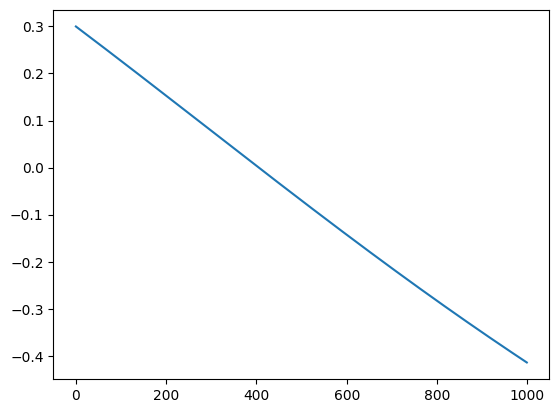

In [7]:
plt.plot(f3_pred[4,:,0])
# plt.plot(f3_train)

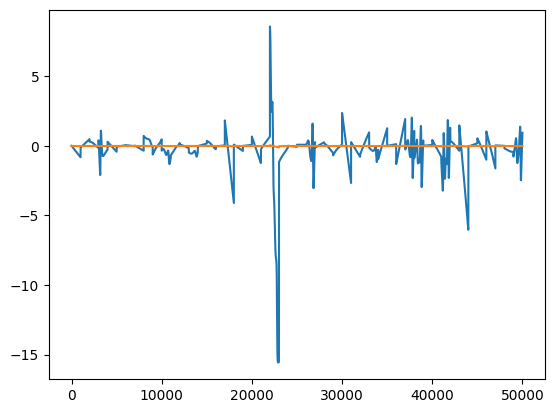

In [8]:
 plt.plot(f3_pred.flatten())
plt.plot(x3_pred.flatten())

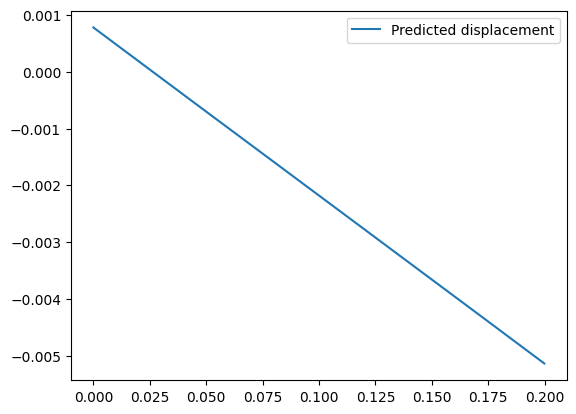

In [9]:
plt.plot(t_train,np.mean(x3_pred,axis=(0, 2)),label='Predicted displacement')
# plt.plot(t_train,x_train[:,1],'r',label='Actual displacement')
plt.legend()

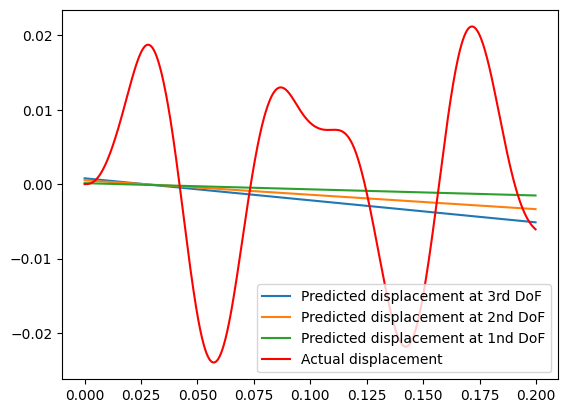

In [10]:
plt.plot(t_train,np.mean(x3_pred,axis=(0, 2)),label='Predicted displacement at 3rd DoF')
plt.plot(t_train,np.mean(x2_pred,axis=(0, 2)),label='Predicted displacement at 2nd DoF')
plt.plot(t_train,np.mean(x1_pred,axis=(0, 2)),label='Predicted displacement at 1nd DoF')
plt.plot(t_train,x_train[:,2],'r',label='Actual displacement')
plt.legend()

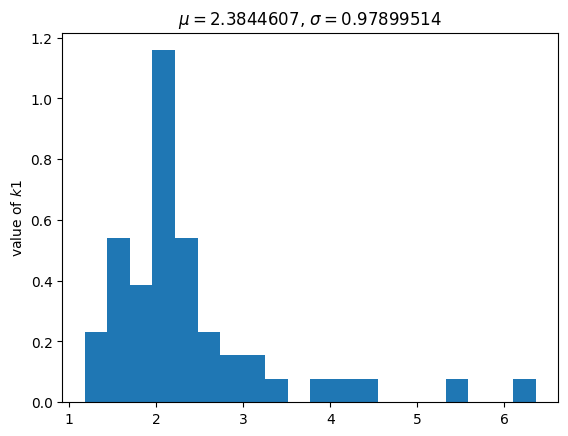

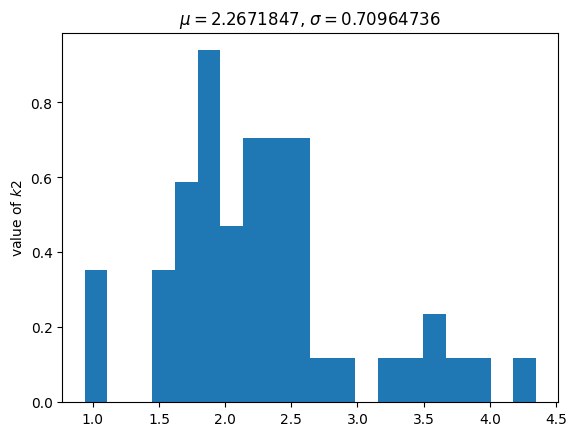

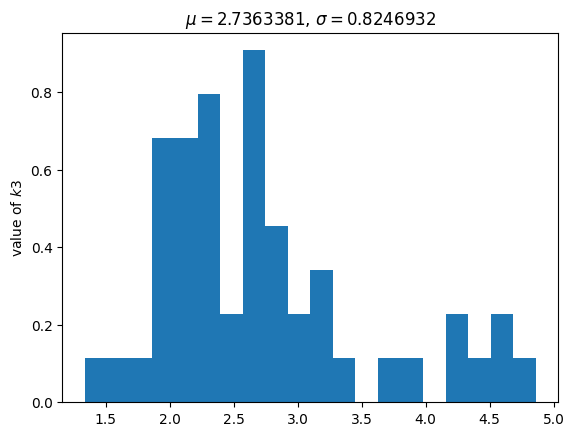

In [11]:
neuq.utils.hist(np.exp(logk1_pred).flatten(), name="value of $k1$")
neuq.utils.hist(np.exp(logk2_pred).flatten(), name="value of $k2$")
neuq.utils.hist(np.exp(logk3_pred).flatten(), name="value of $k3$")